In [1]:
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import LineString, MultiLineString
%matplotlib inline

In [2]:
INPUT_PATH = "../data/extracted/GoT/GoTRelease/"

In [3]:
gotContinents = gp.GeoDataFrame.from_file(INPUT_PATH + 'continents.shp')
gotRivers = gp.GeoDataFrame.from_file(INPUT_PATH + 'rivers.shp')
gotLocations = gp.GeoDataFrame.from_file(INPUT_PATH + 'locations.shp')
gotIslands = gp.GeoDataFrame.from_file(INPUT_PATH + 'islands.shp')
gotCities = gotLocations.loc[gotLocations['type'] == 'City']

# Getting the landscape bounds

We can calculate the bounds of the map with the following commands:

In [4]:
print(gotContinents.bounds)
xBounds = gotContinents.bounds[['minx', 'maxx']]
yBounds = gotContinents.bounds[['miny', 'maxy']]

        minx       miny       maxx       maxy
0   0.901100 -11.222474  26.290153  49.102223
1  28.556198 -34.625524  91.918830  16.610754
2  53.516370 -42.002162  91.993586 -31.039566


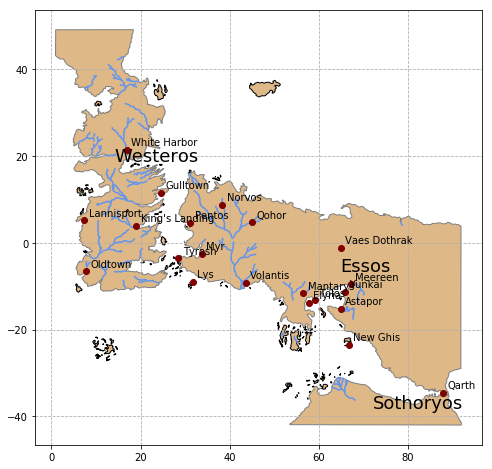

In [8]:
# Creating canvas
fig, ax = plt.subplots(1, figsize=(8, 8))

# Adding continents
for i, gi in enumerate(gotContinents.geometry):
    ax.add_patch(PolygonPatch(gi, color='burlywood', ec='gray', lw=1))
    ax.text(gi.centroid.xy[0][0], gi.centroid.xy[1][0],
            s=gotContinents.iloc[i]['name'], fontsize=18, color='k')

# Adding islands
for gi in gotIslands.geometry:
    ax.add_patch(PolygonPatch(gi, color='burlywood', ec='k', lw=1))

# Adding rivers
for gi in gotRivers.geometry:
    if isinstance(gi, LineString):
        # Some rivers are defined as a single line
        ax.plot(gi.xy[0], gi.xy[1], color='cornflowerblue')
    elif isinstance(gi, MultiLineString):
        # Some are defined as multiple lines
        for j, lj in enumerate(gi):
            ax.plot(lj.xy[0], lj.xy[1], color='cornflowerblue')

# Adding cities
for i, gi in enumerate(gotCities.geometry):  # Add cities
    ax.plot(gi.xy[0], gi.xy[1], marker='o', color='maroon')
    ax.text(gi.xy[0][0]+1, gi.xy[1][0]+1,
            s=gotCities.iloc[i]['name'], color='k')
    
# Adding a grid
ax.grid(linestyle='--')

In [9]:
plt.close()